<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/Test_task_Deeplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# №1

На основе представленных данных, можно выбрать поставщика следующим образом: провести выбор между 2 первыми поставщиками, определить лучшего из них. Далее, сравнить выбранного поставщика со следующим, выбрать лучшего из них, и так далее.

Из двух поставщиков, лучшего стоит выбирать основываясь на поставочной цене, и разнообразии поставляемой продукции. 

Я считаю, что лучший вариант из представленных в таблице поставщиков - D, так как этот поставщик предлагает достаточно разнообразные тетради (по количеству листов и другим свойствам) по минимальной цене.



# №2

In [24]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


Загрузим данные из таблицы:

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
PATH_TO_DATA = '/content/drive/MyDrive/dataset/'
DATASET_PATH = os.path.join(PATH_TO_DATA, 'Test.xlsx')

In [27]:
data = pd.read_excel(DATASET_PATH, sheet_name = "Player_Groups")

In [28]:
data

player     stat1     stat2  stat3     stat4     stat5  stat6  \
0      player1  0.000057  0.463585    NaN  0.269454  0.080972    NaN   
1      player2  0.000258  0.451477    NaN  0.280188  0.053763    NaN   
2      player3  0.000000  0.394161    NaN  0.259720  0.093137    NaN   
3      player4  0.000000  0.595941    NaN  0.285093  0.106122    NaN   
4      player5  0.000053  0.474469    NaN  0.237012  0.069284    NaN   
..         ...       ...       ...    ...       ...       ...    ...   
542  player543  0.000189  0.534304    NaN  0.303557  0.075136    NaN   
543  player544  0.000308  0.458941    NaN  0.219156  0.051532    NaN   
544  player545  0.000062  0.605558    NaN  0.286586  0.049505    NaN   
545  player546  0.000000  0.437931    NaN  0.251155  0.049327    NaN   
546  player547  0.000000  0.469812    NaN  0.254010  0.065061    NaN   

        stat7  stat8     stat9  ...   stat118   stat119   stat120   stat121  \
0    0.480818    NaN  0.058824  ...  0.433083  0.189568  0.393393  0.295057   
1    0.449686    NaN  0.060870  ...  0.419728  0.156165  0.403475  0.232939   
2    0.498138    NaN  0.060150  ...  0.424702  0.178597  0.374286  0.263825   
3    0.409406    NaN  0.094595  ...  0.405199  0.223855  0.410256  0.334586   
4    0.464455    NaN  0.069588  ...  0.447303  0.200082  0.364122  0.272970   
..        ...    ...       ...  ...       ...       ...       ...       ...   
542  0.627917    NaN  0.068460  ...  0.395435  0.186000  0.436798  0.266040   
543  0.449095    NaN  0.034483  ...  0.427721  0.168777  0.506645  0.230414   
544  0.417582    NaN  0.022222  ...  0.358848  0.188563  0.465753  0.257146   
545  0.672457    NaN  0.035714  ...  0.414645  0.202812  0.293333  0.338469   
546  0.481268    NaN  0.062157  ...  0.385593  0.174425  0.356493  0.253706   

      stat122   stat123  stat124   stat125  stat126  stat127  
0    0.251447  0.217143      NaN  0.287408      NaN      NaN  
1    0.149836  0.136318      NaN  0.242417      NaN      NaN  
2    0.258818  0.264657      NaN  0.264686      NaN      NaN  
3    0.270078  0.002787      NaN  0.250378      NaN      NaN  
4    0.307973  0.010024      NaN  0.284349      NaN      NaN  
..        ...       ...      ...       ...      ...      ...  
542  0.243204  0.001825      NaN  0.235458      NaN      NaN  
543  0.209977  0.372106      NaN  0.278913      NaN      NaN  
544  0.257113  0.008716      NaN  0.221611      NaN      NaN  
545  0.232558  0.003523      NaN  0.224957      NaN      NaN  
546  0.224376  0.185434      NaN  0.240711      NaN      NaN  

[547 rows x 128 columns]

Проведем обработкуу данных, удалим столбцы, большую часть которых составляют пропуски, заполним ячейки со значанием NaN медианным значением. 

In [29]:
df = data.drop(columns = ['player'], axis = 1)

for col in df.columns:
  if (df[col].isnull().sum() >= 0.6 * df.shape[0]):
    del df[col]
  else:
    df.loc[df[col].isna(), col] = np.nanmedian(df[col])
    assert not df[col].isna().sum()


Проверим, есть ли игроки, играющие абсолютно одинаково

In [30]:
Dup_Rows = df[df.duplicated()]

print("\n\nПовторяющиеся строки : \n {}".format(Dup_Rows))



Повторяющиеся строки : 
 Empty DataFrame
Columns: [stat1, stat2, stat4, stat5, stat7, stat9, stat11, stat12, stat13, stat14, stat15, stat16, stat17, stat19, stat20, stat22, stat23, stat24, stat25, stat27, stat30, stat32, stat33, stat35, stat36, stat37, stat38, stat39, stat40, stat41, stat42, stat43, stat44, stat45, stat46, stat47, stat48, stat49, stat50, stat51, stat54, stat55, stat56, stat57, stat58, stat59, stat60, stat61, stat63, stat64, stat65, stat66, stat68, stat69, stat70, stat71, stat72, stat73, stat74, stat75, stat76, stat77, stat78, stat79, stat80, stat81, stat82, stat87, stat88, stat89, stat90, stat93, stat94, stat95, stat96, stat97, stat98, stat99, stat100, stat102, stat103, stat104, stat106, stat107, stat109, stat110, stat111, stat113, stat115, stat117, stat118, stat119, stat120, stat121, stat122, stat123, stat125]
Index: []

[0 rows x 97 columns]


Таких игроков не обнаружено

Вычислим элементы описательной статистики для каждого признака и построим график распределения.

In [31]:
df.describe()

stat1       stat2       stat4       stat5       stat7       stat9  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     0.000129    0.495048    0.245525    0.064643    0.493964    0.056323   
std      0.000746    0.064388    0.035332    0.020814    0.054230    0.025259   
min      0.000000    0.282395    0.151038    0.018462    0.342253    0.000000   
25%      0.000000    0.454027    0.221394    0.051024    0.460823    0.040110   
50%      0.000025    0.492730    0.242014    0.062402    0.489479    0.054466   
75%      0.000070    0.538306    0.267557    0.075169    0.528043    0.070280   
max      0.015597    0.684211    0.362096    0.155235    0.728342    0.200000   

           stat11      stat12      stat13      stat14  ...     stat113  \
count  547.000000  547.000000  547.000000  547.000000  ...  547.000000   
mean     0.577297    0.084236    0.090856    0.209782  ...    0.492254   
std      0.087932    0.032233    0.020889    0.021839  ...    0.063769   
min      0.353820    0.005650    0.030924    0.142561  ...    0.282301   
25%      0.516592    0.061683    0.077656    0.196114  ...    0.451269   
50%      0.579289    0.081418    0.090651    0.209181  ...    0.489922   
75%      0.639875    0.098825    0.104522    0.224373  ...    0.534676   
max      0.748105    0.247884    0.160970    0.269231  ...    0.676510   

          stat115     stat117     stat118     stat119     stat120     stat121  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     0.455914    0.288540    0.420378    0.186542    0.400092    0.270931   
std      0.024923    0.023932    0.023476    0.021245    0.056742    0.033486   
min      0.400273    0.227731    0.348084    0.093892    0.225275    0.119658   
25%      0.437264    0.272842    0.405105    0.174365    0.364315    0.253409   
50%      0.456256    0.287105    0.420344    0.187415    0.400711    0.270143   
75%      0.473113    0.301836    0.433231    0.198585    0.438256    0.285444   
max      0.536170    0.480464    0.495659    0.271387    0.579882    0.446606   

          stat122     stat123     stat125  
count  547.000000  547.000000  547.000000  
mean     0.231868    0.054380    0.261088  
std      0.055744    0.087049    0.021722  
min      0.088818    0.000000    0.205401  
25%      0.196014    0.005607    0.246558  
50%      0.229845    0.015219    0.260097  
75%      0.262996    0.058247    0.274356  
max      0.425779    0.496816    0.339120  

[8 rows x 97 columns]

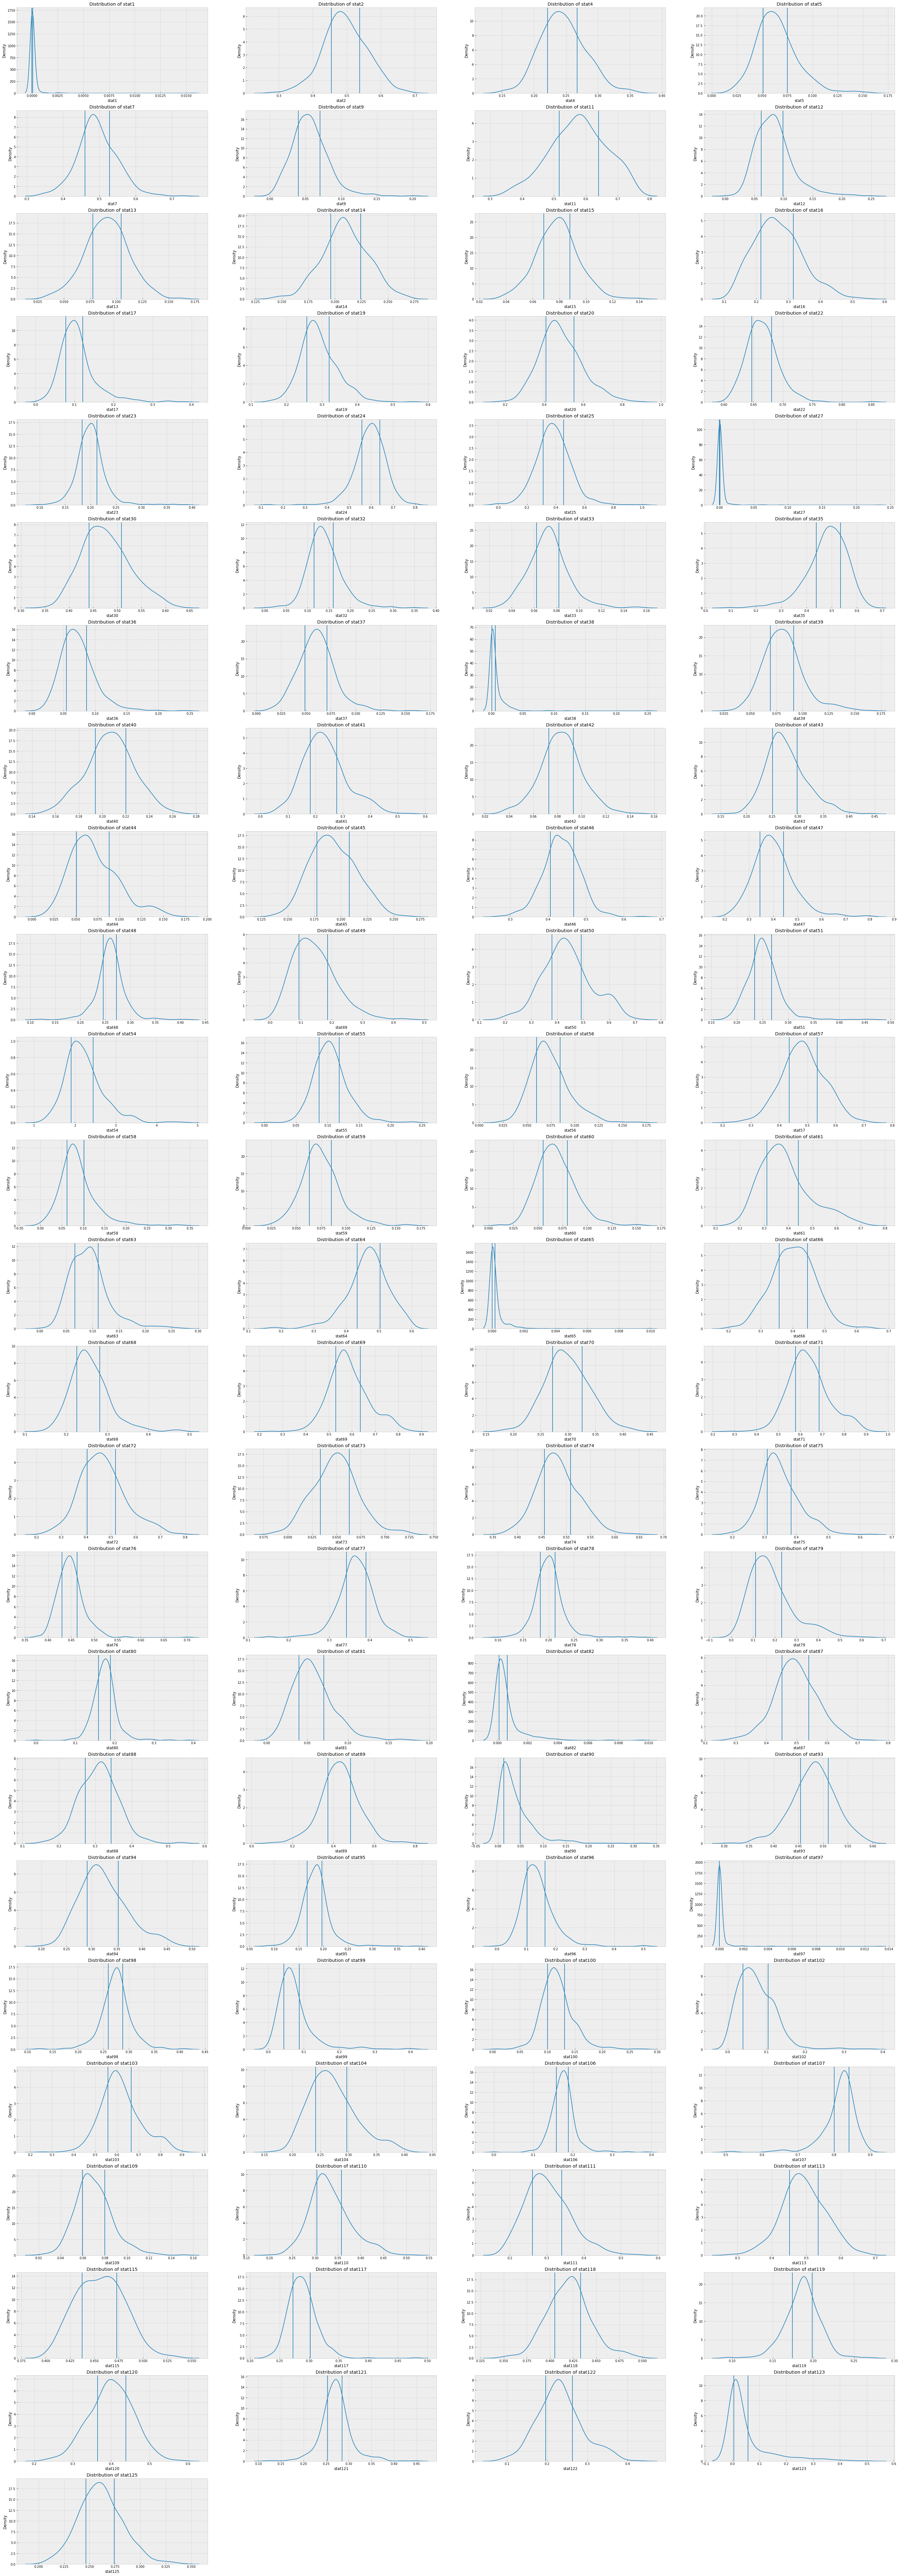

In [32]:
plt.figure(figsize=(50, 300))
plt.style.use('bmh')

num = 0
for col in df.columns:
    if df[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(50, 4, num)
    plt.title(f'Distribution of {col}')
    graph = sns.kdeplot(df[col])
    graph.axvline(df[col].quantile(0.25))
    graph.axvline(df[col].quantile(0.75))

Чтобы найти игроков, играющих похожим образом, проведем кластеризацию, используя алгоритм DBSCAN.

In [33]:
dbscan = DBSCAN(eps=0.45, min_samples=3)#параметры подобраны на основе поиска по сетке
 
dbscan.fit(df)

labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Получено кластеров: %d' % n_clusters_)
print('Точек, не попавших в определенный кластер: %d' % n_noise_)

Получено кластеров: 4
Точек, не попавших в определенный кластер: 118


Будем считать, что каждый игрок, не попавший в определенную группу, образует группу из одного игрока. Присвоим таким группам номера.

In [34]:
df_result = pd.DataFrame()

In [35]:
n_of_cls = n_clusters_
for i in range(len(labels)):
  if labels[i] == -1:
    labels[i] = n_of_cls
    n_of_cls += 1


In [36]:
df_result['groupNum'] = labels
df_result['player'] = data['player']

In [37]:
df_result

groupNum     player
0           0    player1
1           4    player2
2           5    player3
3           0    player4
4           0    player5
..        ...        ...
542       120  player543
543         0  player544
544         0  player545
545       121  player546
546         0  player547

[547 rows x 2 columns]

# №3

Загрузим данные из таблицы:

In [38]:
data = pd.read_excel(DATASET_PATH, sheet_name = "Group_Style_By_stats")

In [39]:
data

player     stat1     stat2  stat3     stat4     stat5  stat6  \
0    gr_player1  0.000000  0.551756    NaN  0.227376  0.089159    NaN   
1    gr_player2  0.000000  0.559532    NaN  0.197149  0.109987    NaN   
2    gr_player3  0.000013  0.542488    NaN  0.193920  0.079732    NaN   
3    gr_player4  0.000000  0.560295    NaN  0.228996  0.078283    NaN   
4    gr_player5  0.000102  0.592927    NaN  0.231728  0.057743    NaN   
5    gr_player6  0.000000  0.519478    NaN  0.183444  0.107854    NaN   
6    gr_player7  0.000099  0.540519    NaN  0.218420  0.086772    NaN   
7    gr_player8  0.000000  0.521501    NaN  0.174364  0.093398    NaN   
8    gr_player9  0.000000  0.605352    NaN  0.244989  0.056550    NaN   
9   gr_player10  0.000066  0.539720    NaN  0.184783  0.106796    NaN   
10  gr_player11  0.000118  0.507830    NaN  0.166456  0.055215    NaN   
11  gr_player12  0.000030  0.548602    NaN  0.231540  0.104651    NaN   
12  gr_player13  0.000019  0.598522    NaN  0.238493  0.048795    NaN   
13  gr_player14  0.000188  0.545607    NaN  0.184220  0.096070    NaN   
14  gr_player15  0.000012  0.603867    NaN  0.248186  0.071293    NaN   
15  gr_player16  0.000016  0.572794    NaN  0.206505  0.103749    NaN   
16  gr_player17  0.000064  0.494107    NaN  0.173443  0.096317    NaN   
17  gr_player18  0.000020  0.539917    NaN  0.212953  0.077313    NaN   
18  gr_player19  0.000037  0.566142    NaN  0.249847  0.103858    NaN   
19  gr_player20  0.000000  0.483466    NaN  0.189205  0.080989    NaN   
20  gr_player21  0.000085  0.511378    NaN  0.195076  0.093468    NaN   
21  gr_player22  0.000000  0.542497    NaN  0.212137  0.118932    NaN   
22  gr_player23  0.000000  0.576786    NaN  0.232984  0.100170    NaN   
23  gr_player24  0.000000  0.555720    NaN  0.195925  0.078947    NaN   
24  gr_player25  0.000018  0.558589    NaN  0.228403  0.078528    NaN   
25  gr_player26  0.000000  0.490014    NaN  0.215533  0.068182    NaN   
26  gr_player27  0.000014  0.565886    NaN  0.225203  0.068458    NaN   
27  gr_player28  0.000000  0.582090    NaN  0.239363  0.069825    NaN   
28  gr_player29  0.000050  0.491848    NaN  0.209356  0.083333    NaN   
29  gr_player30  0.000000  0.556217    NaN  0.200665  0.097610    NaN   
30  gr_player31  0.000033  0.603676    NaN  0.244613  0.101504    NaN   
31  gr_player32  0.000000  0.538564    NaN  0.216429  0.064356    NaN   
32  gr_player33  0.000000  0.623913    NaN  0.210689  0.056471    NaN   
33  gr_player34  0.000149  0.466165    NaN  0.165808  0.077381    NaN   
34  gr_player35  0.000000  0.438491    NaN  0.165907  0.081081    NaN   
35  gr_player36  0.000000  0.578363    NaN  0.213200  0.118987    NaN   
36  gr_player37  0.000000  0.488258    NaN  0.227152  0.069565    NaN   
37  gr_player38  0.000000  0.525040    NaN  0.198639  0.106989    NaN   
38  gr_player39  0.000103  0.499258    NaN  0.179054  0.075567    NaN   
39  gr_player40  0.000000  0.553053    NaN  0.217952  0.091837    NaN   
40  gr_player41  0.000000  0.539961    NaN  0.188102  0.080146    NaN   
41  gr_player42  0.000068  0.581186    NaN  0.221721  0.064439    NaN   
42  gr_player43  0.000030  0.541349    NaN  0.233769  0.064598    NaN   
43  gr_player44  0.000027  0.438389    NaN  0.171233  0.075383    NaN   
44  gr_player45  0.000000  0.554847    NaN  0.218241  0.093567    NaN   
45  gr_player46  0.000000  0.561430    NaN  0.241702  0.078453    NaN   
46  gr_player47  0.000000  0.537415    NaN  0.207977  0.098485    NaN   
47  gr_player48  0.000050  0.478241    NaN  0.209211  0.089482    NaN   
48  gr_player49  0.000000  0.513078    NaN  0.197040  0.052124    NaN   
49  new_player1  0.000000  0.554217    NaN  0.201754  0.092466    NaN   
50  new_player2  0.000000  0.523179    NaN  0.184261  0.100629    NaN   
51  new_player3  0.000043  0.517135    NaN  0.198791  0.088291    NaN   
52  new_player4  0.000000  0.425349    NaN  0.284902  0.045775    NaN   

       stat7  stat8     stat9  ...   stat118   stat119   stat120  

Проведем обработкуу данных, удалим столбцы, большую часть которых составляют пропуски, заполним ячейки со значанием NaN медианным значением. 

In [40]:
df = data.drop(columns = ['player'], axis = 1)

for col in df.columns:
  if (df[col].isnull().sum() >= 0.6 * df.shape[0]):
    del df[col]
  else:
    df.loc[df[col].isna(), col] = np.nanmedian(df[col])
    assert not df[col].isna().sum()


Выделим в таблице строки с игроками группы. Для группы игроков вычислим элементы описательной статистики и построим графики распределения признаков.

In [41]:
df_group = df[:-4]

In [42]:
descr = df_group.describe()
descr

stat1      stat2      stat4      stat5      stat7      stat9  \
count  49.000000  49.000000  49.000000  49.000000  49.000000  49.000000   
mean    0.000029   0.540533   0.209573   0.083722   0.619539   0.088133   
std     0.000044   0.042097   0.023784   0.017967   0.025093   0.028859   
min     0.000000   0.438389   0.165808   0.048795   0.561432   0.030928   
25%     0.000000   0.513078   0.193920   0.069825   0.604167   0.066667   
50%     0.000000   0.542497   0.212137   0.080989   0.620611   0.088235   
75%     0.000037   0.565886   0.228403   0.097610   0.633764   0.106383   
max     0.000188   0.623913   0.249847   0.118987   0.685624   0.148515   

          stat11     stat12     stat13     stat14  ...    stat113    stat115  \
count  49.000000  49.000000  49.000000  49.000000  ...  49.000000  49.000000   
mean    0.645463   0.103378   0.078916   0.174173  ...   0.533279   0.524810   
std     0.045342   0.019171   0.008759   0.016767  ...   0.042637   0.019642   
min     0.528707   0.063344   0.050592   0.135017  ...   0.432753   0.485176   
25%     0.623690   0.093294   0.073726   0.162665  ...   0.503948   0.511203   
50%     0.649620   0.100592   0.080154   0.170047  ...   0.536821   0.525614   
75%     0.664804   0.119895   0.084339   0.188033  ...   0.558827   0.540113   
max     0.779392   0.151344   0.097127   0.205647  ...   0.614509   0.562930   

         stat117    stat118    stat119    stat120    stat121    stat122  \
count  49.000000  49.000000  49.000000  49.000000  49.000000  49.000000   
mean    0.303139   0.451366   0.208157   0.317417   0.267814   0.302837   
std     0.013051   0.018891   0.010585   0.039710   0.012628   0.017172   
min     0.275128   0.424543   0.178428   0.206704   0.242901   0.274049   
25%     0.294986   0.439452   0.201608   0.297872   0.258882   0.290530   
50%     0.302927   0.445217   0.207946   0.315126   0.266242   0.299060   
75%     0.311545   0.462004   0.214464   0.340476   0.276149   0.314882   
max     0.330523   0.503048   0.232718   0.433898   0.295311   0.346110   

         stat123    stat125  
count  49.000000  49.000000  
mean    0.009442   0.264321  
std     0.007946   0.010170  
min     0.000000   0.244630  
25%     0.003671   0.258438  
50%     0.007303   0.261988  
75%     0.012301   0.269510  
max     0.034413   0.287544  

[8 rows x 98 columns]

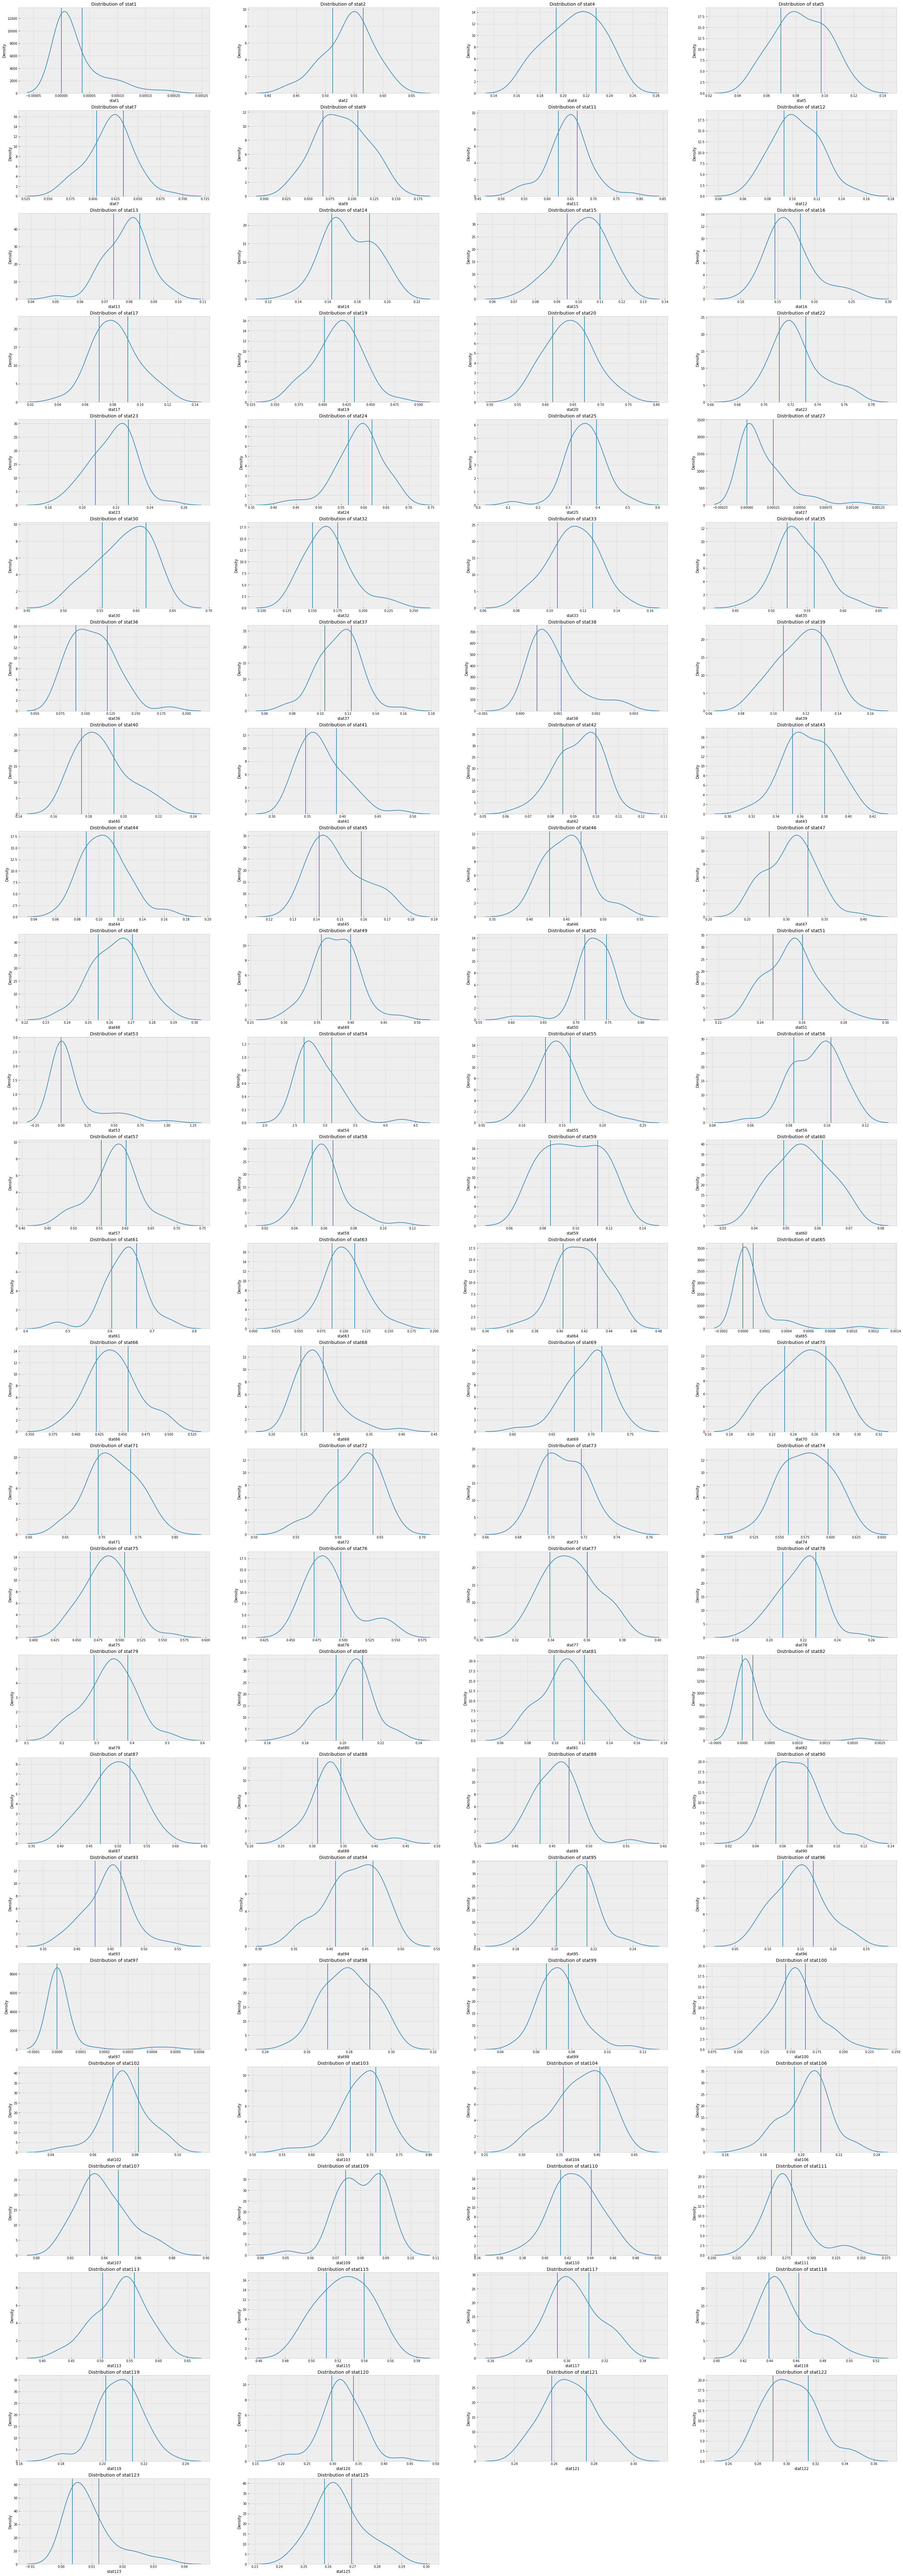

In [43]:
plt.figure(figsize=(50, 300))
plt.style.use('bmh')

num = 0
for col in df.columns:
    if df_group[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(50, 4, num)
    plt.title(f'Distribution of {col}')
    graph = sns.kdeplot(df_group[col])
    graph.axvline(df_group[col].quantile(0.25))
    graph.axvline(df_group[col].quantile(0.75))

Выделим строки с новыми игроками.

In [44]:
df_new = df[-4:]


Для каждого игрока проверим, принадлежит ли он группе. Будем считать, что игрок попадает в группу, если большинство значений признаков этого игрока лежат в диапазоне значений группы (допустима небольшая погрешность для каждого признака). Для каждого игрока, составим список признаков со значениями, лежащими вне диапазона значений группы.

In [45]:
A = []
for i in range(df_new.shape[0]):
    A.append([])

for i in range(df_new.shape[0]):
  for col in df_new.columns:
    if df_new.iloc[i][col] < (descr.loc['min'][col] - 0.1 * descr.loc['mean'][col]) or df_new.iloc[i][col] > (descr.loc['max'][col] + 0.1 * descr.loc['mean'][col]):
      A[i].append(col)

A

[['stat17',
  'stat41',
  'stat45',
  'stat47',
  'stat49',
  'stat50',
  'stat58',
  'stat60',
  'stat66',
  'stat72',
  'stat81',
  'stat89',
  'stat102',
  'stat120',
  'stat122'],
 [],
 ['stat16'],
 ['stat4',
  'stat20',
  'stat33',
  'stat37',
  'stat39',
  'stat41',
  'stat49',
  'stat60',
  'stat61',
  'stat65',
  'stat66',
  'stat70',
  'stat80',
  'stat82',
  'stat90',
  'stat94',
  'stat102',
  'stat106',
  'stat122']]

Игрока №2 можно уверенно отнести к данной группе. Игрока №3 также можно отнести к данной группе, при условии, что все признаки равнозначны, так как его характеристики содержат только 1 признак, значение которого не характерно для группы. Игроков №1 и №4 нельзя отнести к данной группе.